In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Importing the dataset
df = pd.read_csv("ADOSep2023_A1-GDP growth.csv", encoding='latin1')
df.rename(columns=lambda x: x.strip(), inplace=True)
print(df.columns)



Index(['RegionalMember', 'Year', 'GDP growth', 'Unit of Measurement',
       'Subregion', 'Country Code'],
      dtype='object')


In [3]:
pd.options.display.max_rows = 375
df
#increasing max no. of rows that can be displayed

,RegionalMember,Year,GDP growth,Unit of Measurement,Subregion,Country Code
0,Developing Asia,2020,-0.6,%,NaN,NaN
1,Developing Asia,2021,7.2,%,NaN,NaN
2,Developing Asia,2022,4.3,%,NaN,NaN
3,Developing Asia,2023 Forecast (ADO Apr 2023),4.8,%,NaN,NaN
4,Developing Asia,2023 Forecast (ADO Sep 2023),4.7,%,NaN,NaN
5,Developing Asia,2024 Forecast (ADO Apr 2023),4.8,%,NaN,NaN
6,Developing Asia,2024 Forecast (ADO Sep 2023),4.8,%,NaN,NaN
7,Developing Asia excluding the PRC,2020,-3.2,%,NaN,NaN
8,Developing Asia excluding the PRC,2021,6.1,%,NaN,NaN
9,Developing Asia excluding the PRC,2022,5.5,%,NaN,NaN


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RegionalMember       371 non-null    object 
 1   Year                 371 non-null    object 
 2   GDP growth           360 non-null    float64
 3   Unit of Measurement  371 non-null    object 
 4   Subregion            357 non-null    object 
 5   Country Code         322 non-null    object 
dtypes: float64(1), object(5)
memory usage: 17.5+ KB
None


In [5]:
#dropping null GDP Growth
print(df[df["GDP growth"].isna()])
print("The sum before droppping is: ",df["GDP growth"].isna().sum())
df1 = df.dropna(subset = ["GDP growth"]).copy()
print("The sum after dropping is: ",df1["GDP growth"].isna().sum())

    RegionalMember                          Year  GDP growth  \
63    Turkmenistan                          2020         NaN   
128    Afghanistan                          2022         NaN   
129    Afghanistan  2023 Forecast (ADO Apr 2023)         NaN   
130    Afghanistan  2023 Forecast (ADO Sep 2023)         NaN   
131    Afghanistan  2024 Forecast (ADO Apr 2023)         NaN   
132    Afghanistan  2024 Forecast (ADO Sep 2023)         NaN   
317           Niue                          2022         NaN   
318           Niue  2023 Forecast (ADO Apr 2023)         NaN   
319           Niue  2023 Forecast (ADO Sep 2023)         NaN   
320           Niue  2024 Forecast (ADO Apr 2023)         NaN   
321           Niue  2024 Forecast (ADO Sep 2023)         NaN   

    Unit of Measurement                  Subregion Country Code  
63                    %  Caucasus and Central Asia          TKM  
128                   %                 South Asia          AFG  
129                   %          

In [6]:
print(df1)

                        RegionalMember                          Year  \
0                      Developing Asia                          2020   
1                      Developing Asia                          2021   
2                      Developing Asia                          2022   
3                      Developing Asia  2023 Forecast (ADO Apr 2023)   
4                      Developing Asia  2023 Forecast (ADO Sep 2023)   
5                      Developing Asia  2024 Forecast (ADO Apr 2023)   
6                      Developing Asia  2024 Forecast (ADO Sep 2023)   
7    Developing Asia excluding the PRC                          2020   
8    Developing Asia excluding the PRC                          2021   
9    Developing Asia excluding the PRC                          2022   
10   Developing Asia excluding the PRC  2023 Forecast (ADO Apr 2023)   
11   Developing Asia excluding the PRC  2023 Forecast (ADO Sep 2023)   
12   Developing Asia excluding the PRC  2024 Forecast (ADO Apr 2

In [7]:
#Taking avg of halves of 2023 and 2024 and deleting extra data
df2 = df1.copy()

for i in df2["RegionalMember"].unique():


    df_apr = df2.loc[(df2['Year'] == "2023 Forecast (ADO Apr 2023)") & (df2['RegionalMember'] == i), 'GDP growth']
    df_sep = df2.loc[(df2['Year'] == "2023 Forecast (ADO Sep 2023)") & (df2['RegionalMember'] == i), 'GDP growth']


    if not df_apr.empty and not df_sep.empty:
        mean_growth = (df_apr.values[0] + df_sep.values[0]) / 2

        df2.loc[(df2['Year'] == "2023 Forecast (ADO Apr 2023)") & (df2['RegionalMember'] == i), 'GDP growth'] = mean_growth
    else:
        print(f"No data found for RegionalMember: {i}")

    df_apr = df2.loc[(df2['Year'] == "2024 Forecast (ADO Apr 2023)") & (df2['RegionalMember'] == i), 'GDP growth']
    df_sep = df2.loc[(df2['Year'] == "2024 Forecast (ADO Sep 2023)") & (df2['RegionalMember'] == i), 'GDP growth']


    if not df_apr.empty and not df_sep.empty:
        mean_growth = (df_apr.values[0] + df_sep.values[0]) / 2

        df2.loc[(df2['Year'] == "2024 Forecast (ADO Apr 2023)") & (df2['RegionalMember'] == i), 'GDP growth'] = mean_growth
    else:
        print(f"No data found for RegionalMember: {i}")

df2 = df2[~df2['Year'].isin(["2023 Forecast (ADO Sep 2023)", "2024 Forecast (ADO Sep 2023)"])]
df2.loc[df2['Year'] == "2023 Forecast (ADO Apr 2023)", 'Year'] = "2023"

df2.loc[df2['Year'] == "2024 Forecast (ADO Apr 2023)", 'Year'] = "2024"


df2


No data found for RegionalMember: Afghanistan
No data found for RegionalMember: Afghanistan
No data found for RegionalMember: Niue
No data found for RegionalMember: Niue


,RegionalMember,Year,GDP growth,Unit of Measurement,Subregion,Country Code
0,Developing Asia,2020,-0.60,%,NaN,NaN
1,Developing Asia,2021,7.20,%,NaN,NaN
2,Developing Asia,2022,4.30,%,NaN,NaN
3,Developing Asia,2023,4.75,%,NaN,NaN
5,Developing Asia,2024,4.80,%,NaN,NaN
7,Developing Asia excluding the PRC,2020,-3.20,%,NaN,NaN
8,Developing Asia excluding the PRC,2021,6.10,%,NaN,NaN
9,Developing Asia excluding the PRC,2022,5.50,%,NaN,NaN
10,Developing Asia excluding the PRC,2023,4.55,%,NaN,NaN
12,Developing Asia excluding the PRC,2024,5.05,%,NaN,NaN


In [8]:
print(df2[df2.duplicated()])
#no duplicates

Empty DataFrame
Columns: [RegionalMember, Year, GDP growth, Unit of Measurement, Subregion, Country Code]
Index: []


In [9]:
#Filling empty subregion
df2.loc[df2['RegionalMember'] == "Developing Asia", 'Subregion'] = "Developing Asia"

df2.loc[df2['RegionalMember'] == "Developing Asia excluding the PRC", 'Subregion'] = "Developing Asia excluding the PRC"
df2

,RegionalMember,Year,GDP growth,Unit of Measurement,Subregion,Country Code
0,Developing Asia,2020,-0.60,%,Developing Asia,NaN
1,Developing Asia,2021,7.20,%,Developing Asia,NaN
2,Developing Asia,2022,4.30,%,Developing Asia,NaN
3,Developing Asia,2023,4.75,%,Developing Asia,NaN
5,Developing Asia,2024,4.80,%,Developing Asia,NaN
7,Developing Asia excluding the PRC,2020,-3.20,%,Developing Asia excluding the PRC,NaN
8,Developing Asia excluding the PRC,2021,6.10,%,Developing Asia excluding the PRC,NaN
9,Developing Asia excluding the PRC,2022,5.50,%,Developing Asia excluding the PRC,NaN
10,Developing Asia excluding the PRC,2023,4.55,%,Developing Asia excluding the PRC,NaN
12,Developing Asia excluding the PRC,2024,5.05,%,Developing Asia excluding the PRC,NaN


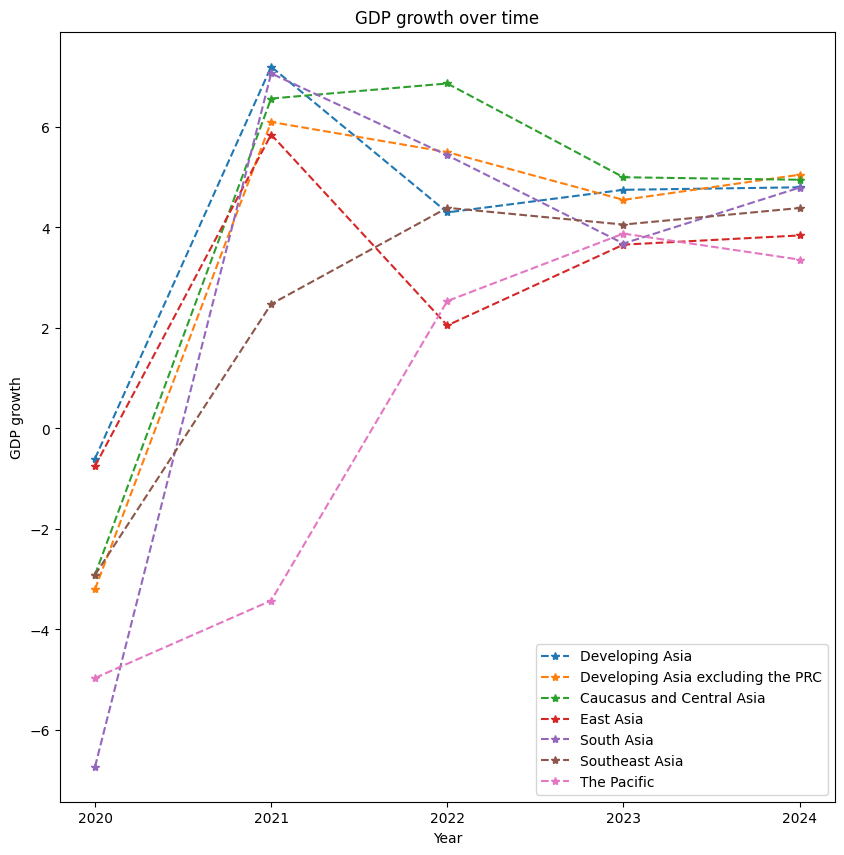

In [10]:
#Subregion vs Mean Growth %
plt.figure(figsize=(10, 10))


for i in df2["Subregion"].unique():
    df_sub = df2[df2['Subregion'] == i]
    mean_growth = df_sub.groupby('Year')['GDP growth'].mean()
    plt.plot(mean_growth.index, mean_growth.values, label=i,linestyle="dashed", marker="*")

plt.xlabel('Year')
plt.ylabel('GDP growth')
plt.title('GDP growth over time')
plt.legend()

plt.show()

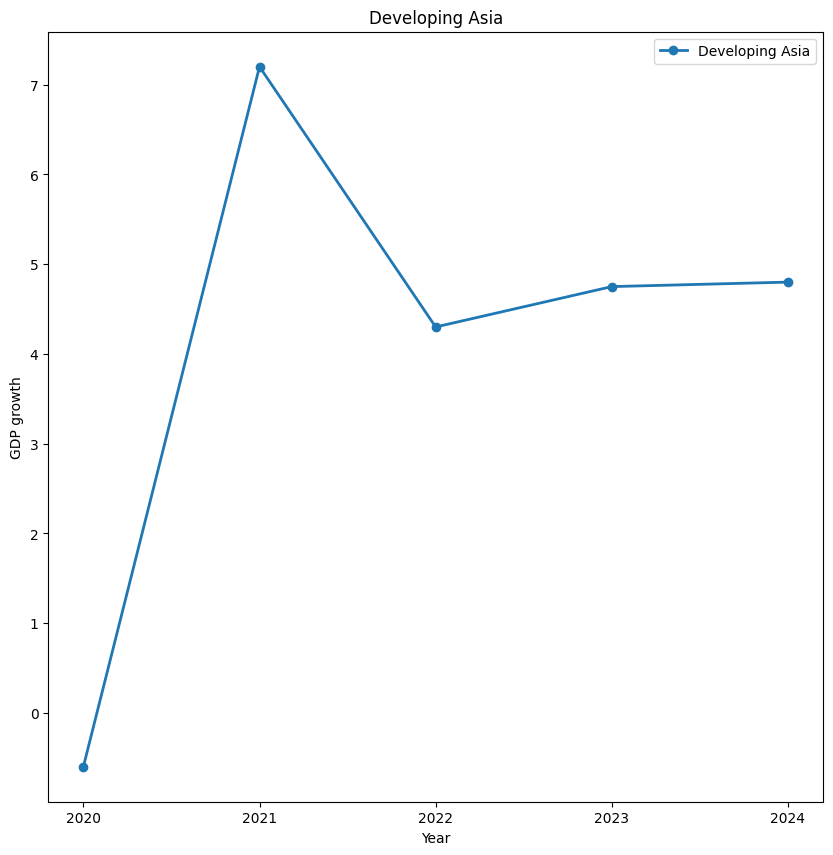

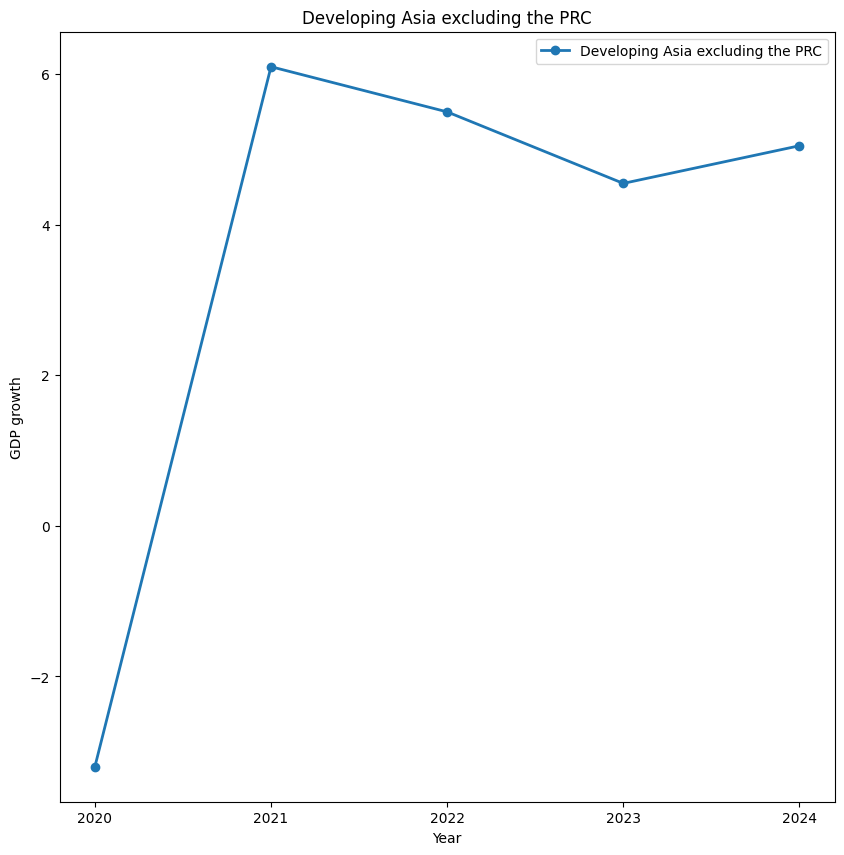

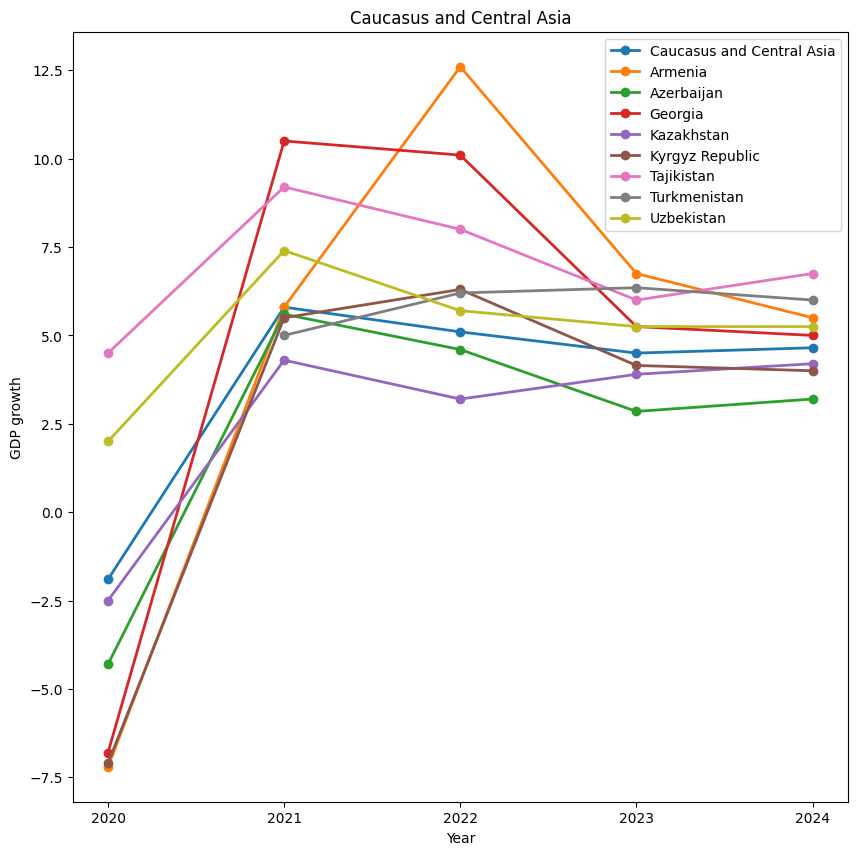

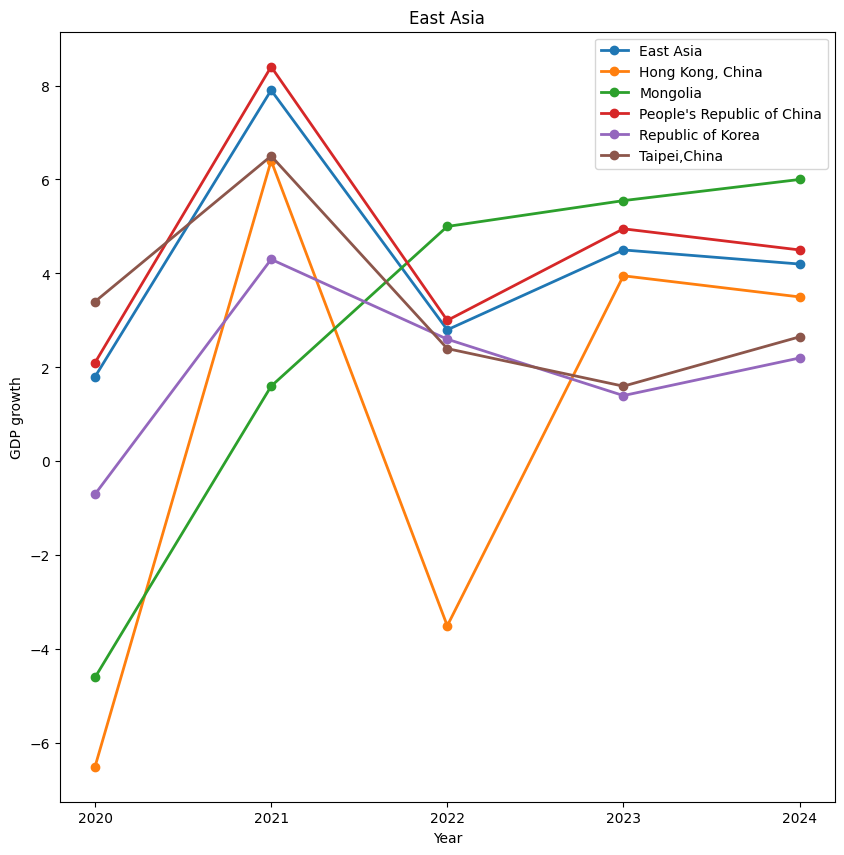

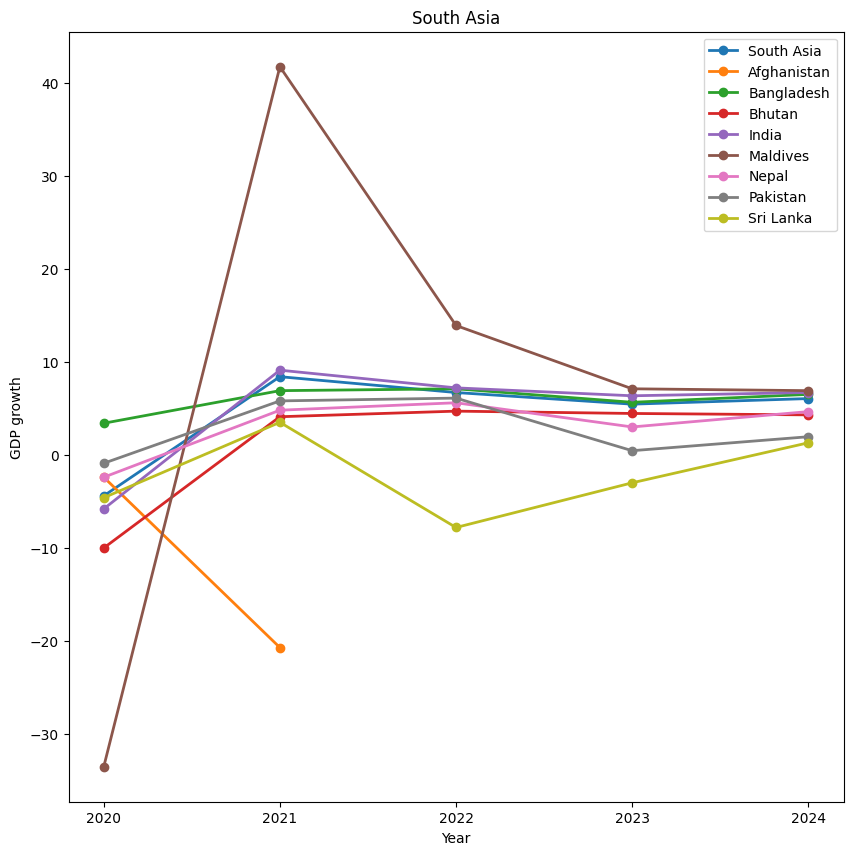

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


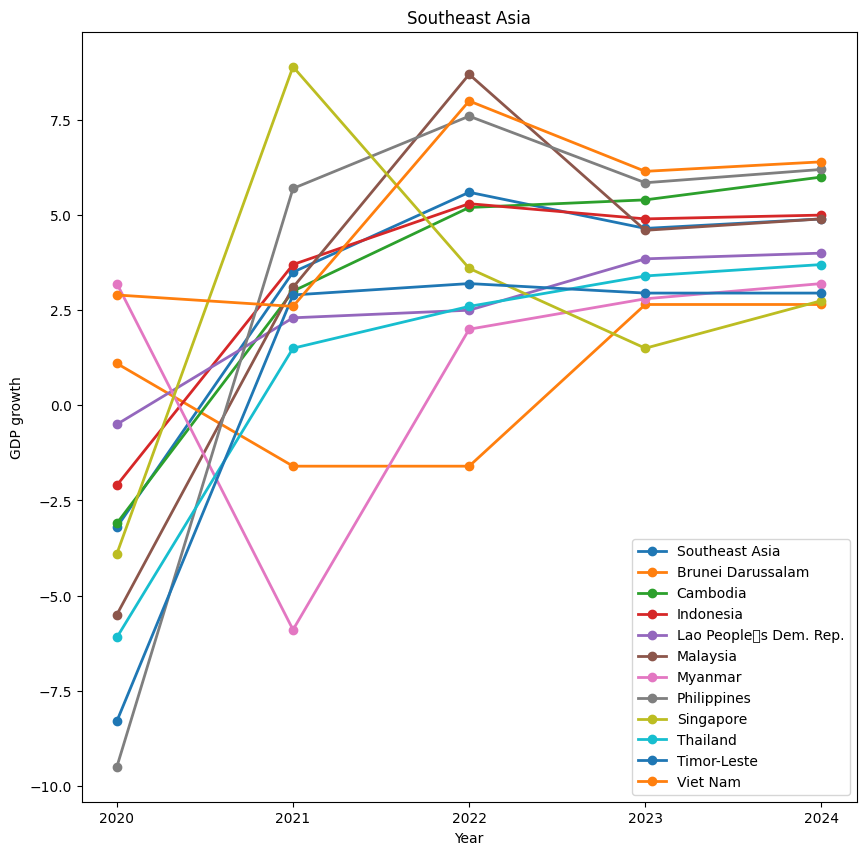

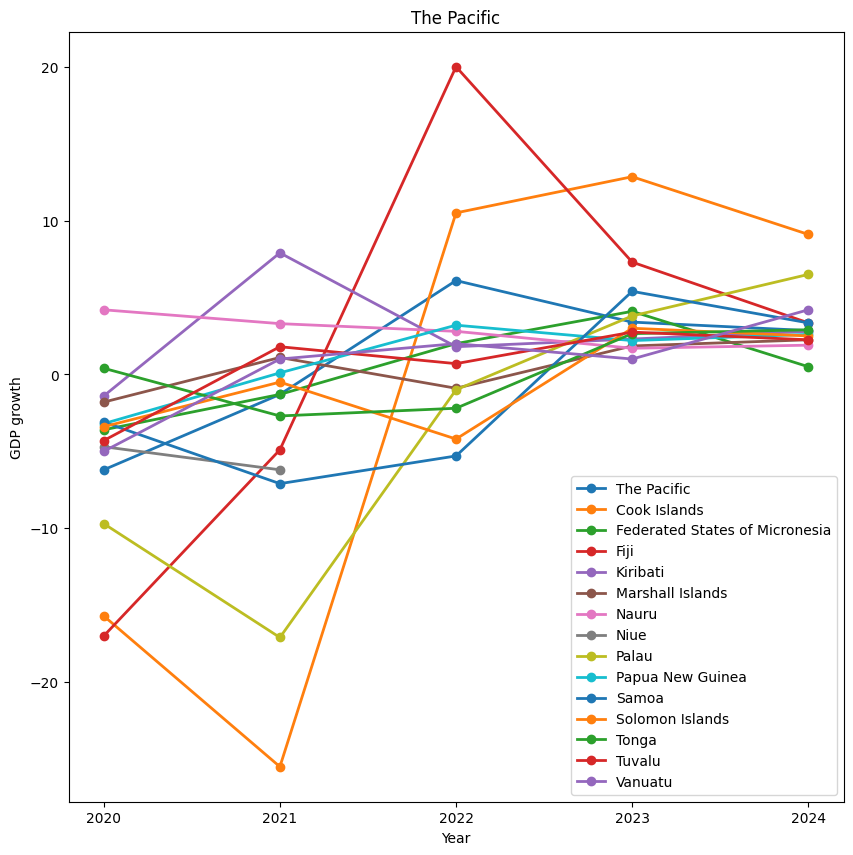

In [11]:
#GDP Growth of each RegionalMember per Subregion
for i in df2["Subregion"].unique():
    plt.figure(figsize=(10, 10))
    for j in df2[df2['Subregion'] == i]["RegionalMember"].unique():
      df_mem = df2[(df2['Subregion'] == i) & (df2['RegionalMember'] == j)]
      mean_growth = df_mem.groupby('Year')['GDP growth'].mean()
      plt.plot(mean_growth.index, mean_growth.values, label=j, linewidth = "2", marker = "o")

    plt.xlabel('Year')
    plt.ylabel('GDP growth')
    plt.title(i)
    plt.legend()

    plt.show()


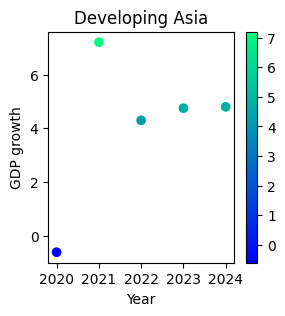

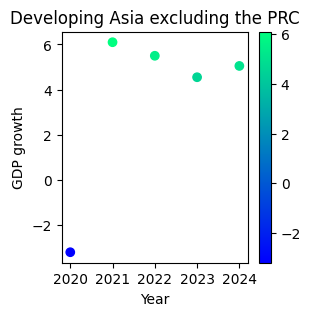

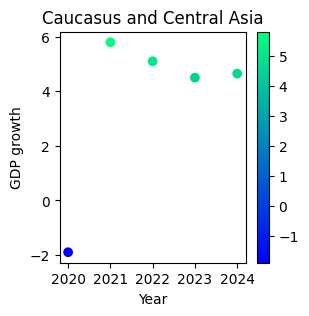

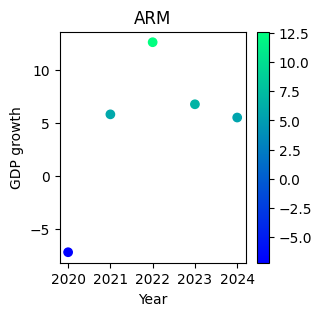

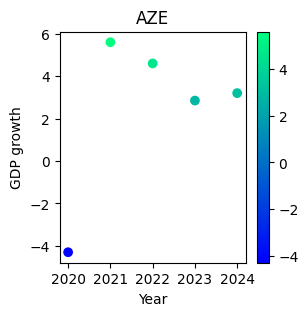

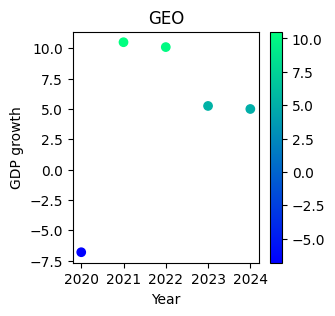

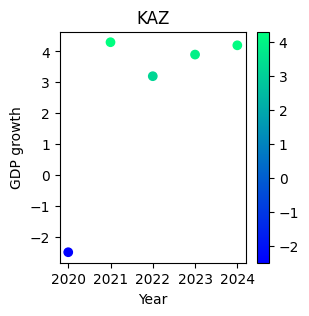

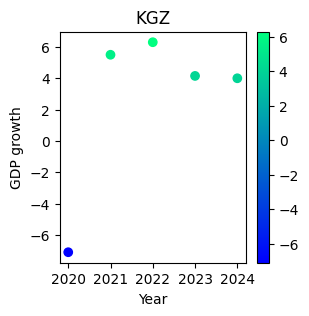

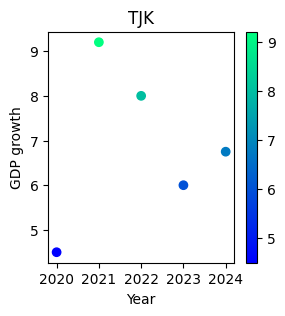

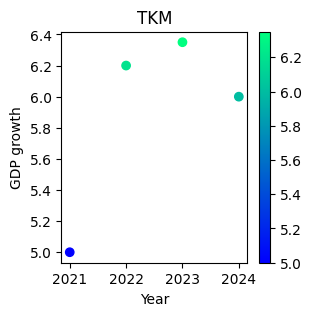

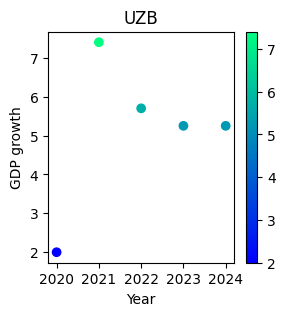

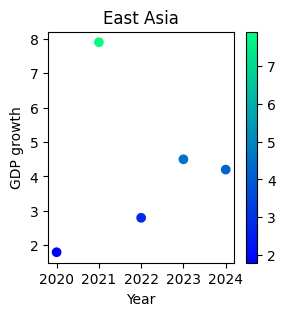

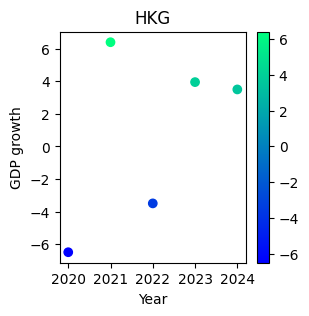

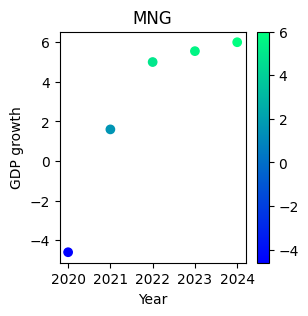

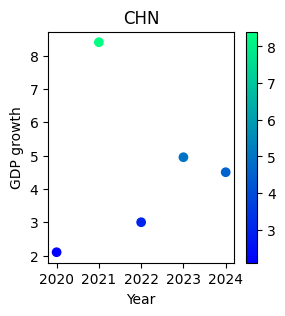

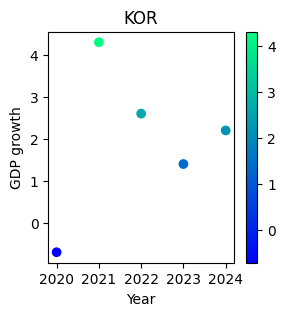

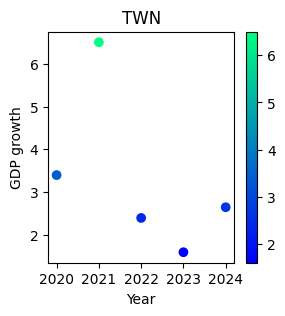

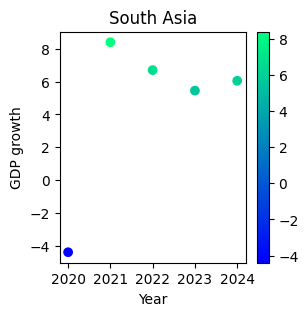

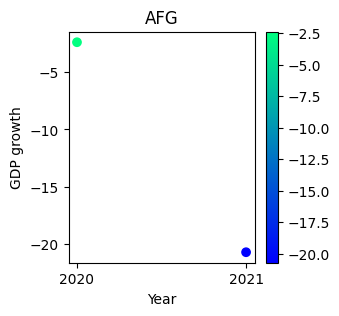

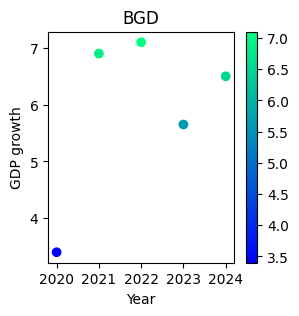

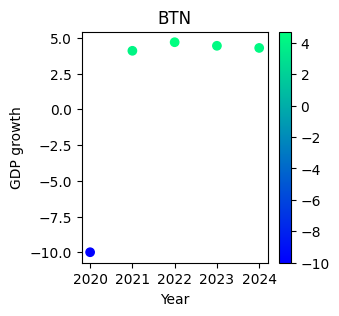

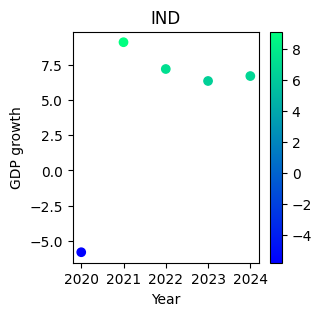

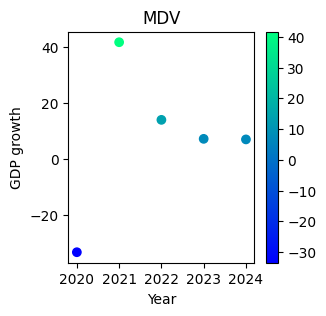

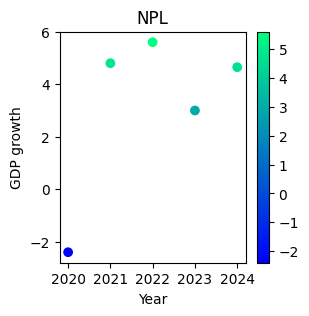

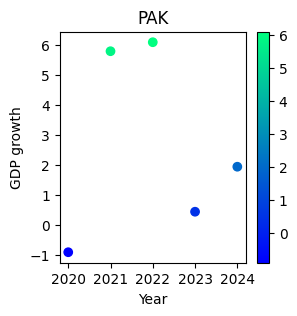

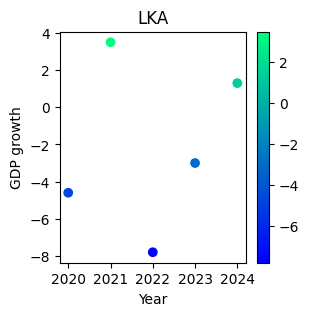

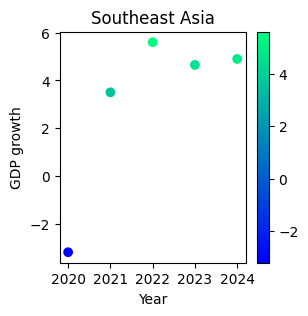

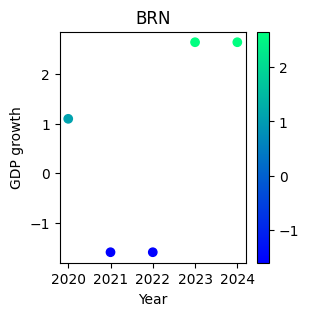

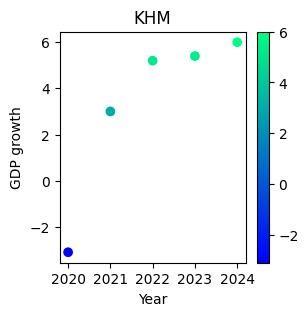

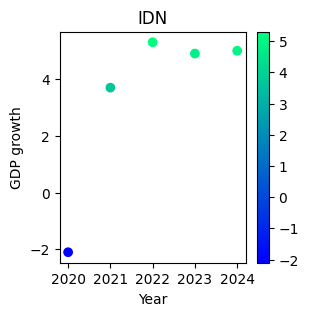

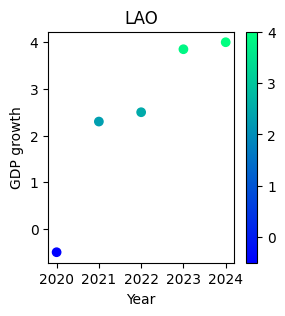

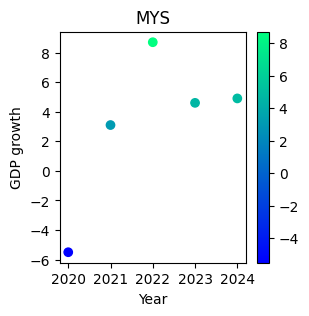

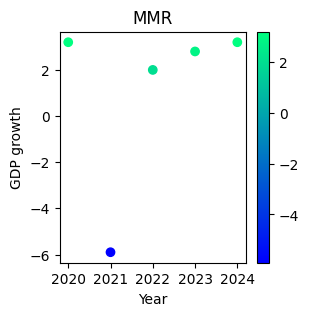

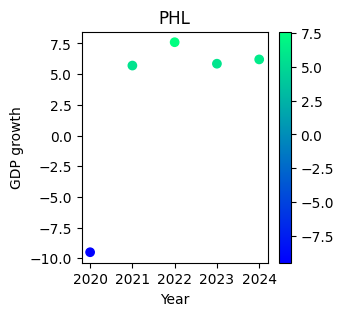

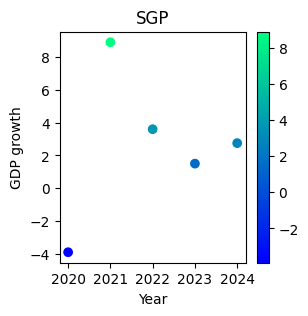

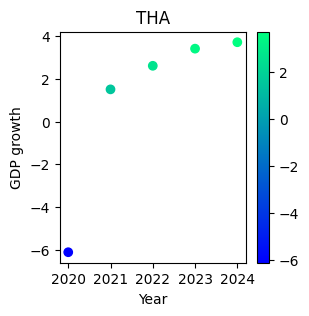

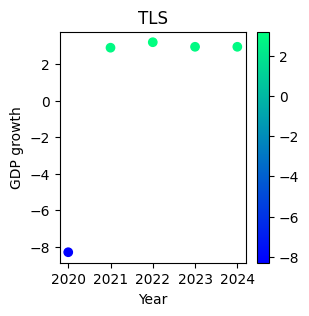

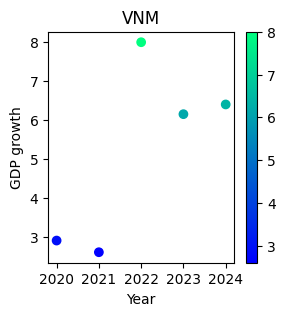

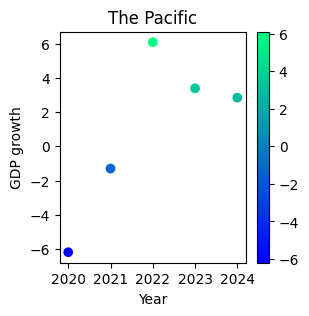

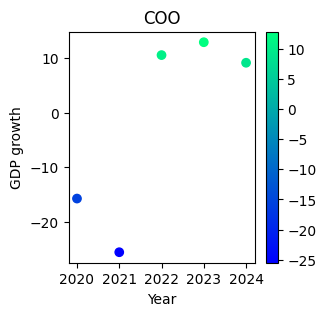

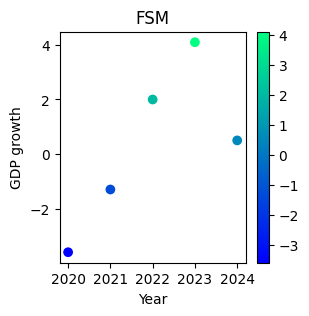

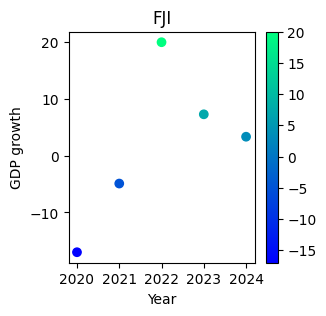

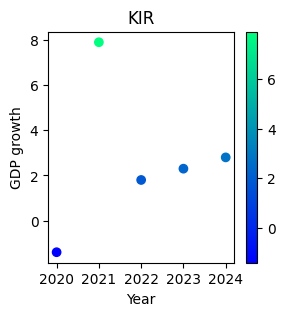

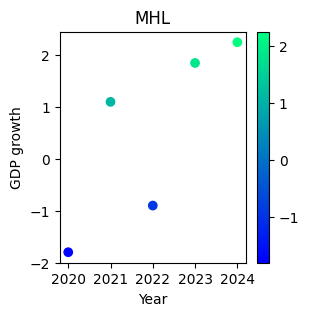

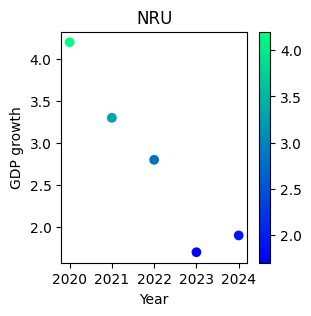

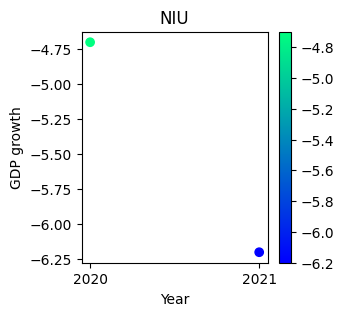

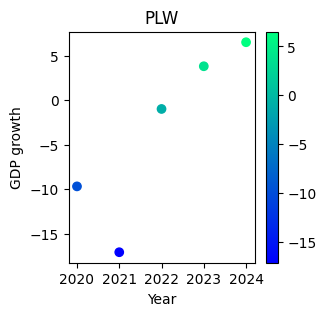

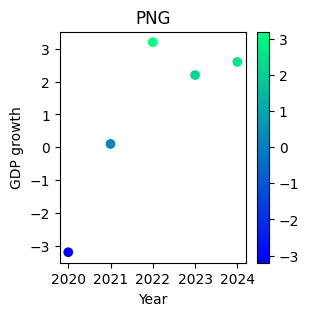

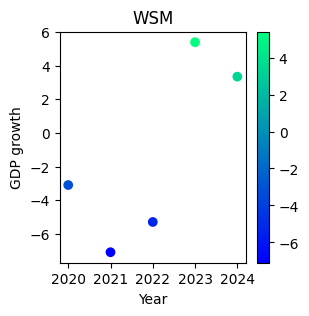

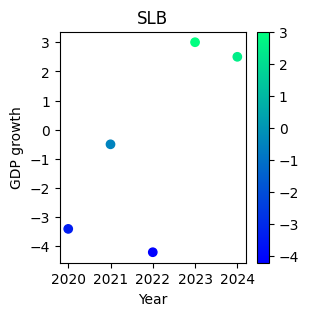

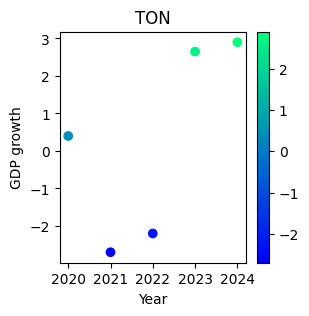

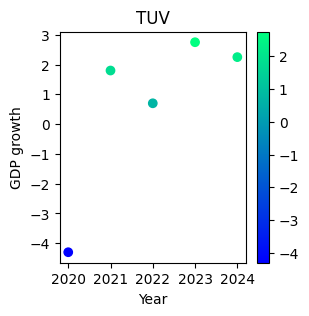

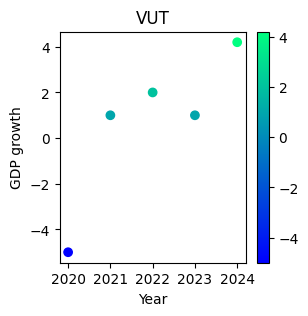

In [15]:
#GDP Growth per RegionalMember
for i in df2["RegionalMember"].unique():
    plt.figure(figsize=(3,3))
    df_mem = df2[df2['RegionalMember'] == i]
    plt.scatter(df_mem["Year"], df_mem["GDP growth"],c =df_mem["GDP growth"], cmap = "winter")
    plt.xlabel('Year')
    plt.ylabel('GDP growth')

    if df_mem["Country Code"].isna().any():
        plt.title(i)
    else:
        plt.title(df_mem.loc[df_mem["Country Code"].notna(), "Country Code"].iloc[0])
    plt.colorbar()
    plt.show()
    print("\t")


